In [13]:
import autograd.numpy as np
from autograd import grad 
import autograd.numpy.random as npr

from autograd.core import primitive

from matplotlib import pyplot as plt
%matplotlib inline

## BVP

In [14]:
nx = 10
dx = 1. / nx

In [15]:
def f(x, psy, d_psy):
    '''
        d(psy)/dx = f(x, psy)
        This is f() function on the right
    '''
    return B(x) - psy * A(x)

In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [17]:
def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [18]:
def neural_network(W, x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])

In [19]:
def d_neural_network_dx(W, x, k=1):
    return np.dot(np.dot(W[1].T, W[0].T**k), sigmoid_grad(x))

In [ ]:
def d_psi_t():

In [20]:
def loss_function(W, x, A, a, B, b):
    loss_sum = 0.
    for xi in x:
        net_out = neural_network(W, xi)[0][0]
        psy_t = (b*A - a*B)/(b - a) + ((B - A)/(b - a) * xi) + (xi - a)*(xi  -zb)*net_out
        d_net_out = d_neural_network_dx(W, xi)[0][0]
        d_psy_t = (B - A)/(b - a) + (xi - b)*net_out + (xi - a)*net_out + (x - a)*(x - b)*d_neural_network_dx
        d2_psy_t = 2*net_out + (x - a)*d_neural_network_dx + (x - b)*d_neural_network_dx + (x - a)*(x - b)*d_neural_network_dx**2
        func = f(xi, psy_t, d_psy_t)       
        err_sqr = (d2_psy_t - func)**2

        loss_sum += err_sqr
    return loss_sum

In [26]:
x_space = np.linspace(0, 1, nx)  

In [27]:
W = [npr.randn(1, 10), npr.randn(10, 1)]
lmb = 0.001

#x = np.array(1)
#print (neural_network(W, x))
#print (d_neural_network_dx(W, x))

for i in range(1000):
    loss_grad =  grad(loss_function)(W, x_space)
    
    #print (loss_grad[0].shape, W[0].shape)
    #print (loss_grad[1].shape, W[1].shape)
    #Descenso de gradiente 
    W[0] = W[0] - lmb * loss_grad[0]
    W[1] = W[1] - lmb * loss_grad[1]
    
    #print (loss_function(W, x_space))

TypeError: loss_function() missing 4 required positional arguments: 'A', 'a', 'B', and 'b'

In [28]:
print(loss_function(W, x_space))

TypeError: loss_function() missing 4 required positional arguments: 'A', 'a', 'B', and 'b'

In [29]:
print (W)

[array([[-0.83736762, -0.05034919,  0.70179358,  1.00925586,  0.93224945,
        -1.25040107, -0.29125768, -0.89388984, -0.12162807, -0.62153698]]), array([[-0.0321308 ],
       [ 1.83948826],
       [-1.0496137 ],
       [-1.25707127],
       [-1.61826518],
       [-1.53729098],
       [ 0.08192983],
       [ 1.1355332 ],
       [-0.23336909],
       [-0.39988042]])]


In [30]:
res = [1 + xi * neural_network(W, xi)[0][0] for xi in x_space] 

In [1]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from autograd.misc.optimizers import adam
import matplotlib.pyplot as plt

In [2]:
def init_random_params(scale, layer_sizes, rs=npr.RandomState(0)):
    """Build a list of (weights, biases) tuples, one for each layer."""
    return [(rs.randn(insize, outsize) * scale,   # weight matrix
             rs.randn(outsize) * scale)           # bias vector
            for insize, outsize in zip(layer_sizes[:-1], layer_sizes[1:])]

In [3]:
def swish(x):
    "see https://arxiv.org/pdf/1710.05941.pdf"
    return x / (1.0 + np.exp(-x))

In [4]:
def f(params, inputs):
    "Neural network functions"
    for W, b in params:
        outputs = np.dot(inputs, W) + b
        inputs = swish(outputs)    
    return outputs

In [5]:
# Here is our initial guess of params:
params = init_random_params(0.1, layer_sizes=[1, 8, 1])

# Derivatives
fp = elementwise_grad(f, 1)
fpp = elementwise_grad(fp, 1)
fppp = elementwise_grad(fpp, 1)

eta = np.linspace(0, 6).reshape((-1, 1))

In [6]:
# This is the function we seek to minimize
def objective(params, step):
    # These should all be zero at the solution
    # f''' + 0.5 f'' f = 0
    zeq = fppp(params, eta) + 0.5 * f(params, eta) * fpp(params, eta) 
    bc0 = f(params, 0.0)  # equal to zero at solution
    bc1 = fp(params, 0.0)  # equal to zero at solution
    bc2 = fp(params, 6.0) - 1.0 # this is the one at "infinity"
    return np.mean(zeq**2) + bc0**2 + bc1**2 + bc2**2

In [7]:
def callback(params, step, g):
    if step % 1000 == 0:
        print("Iteration {0:3d} objective {1}".format(step,
                                                      objective(params, step)))

In [8]:
params = adam(grad(objective), params,
              step_size=0.001, num_iters=10000, callback=callback) 

Iteration   0 objective [[1.11472535]]
Iteration 1000 objective [[0.00049768]]
Iteration 2000 objective [[0.0004579]]
Iteration 3000 objective [[0.00041697]]
Iteration 4000 objective [[0.00037408]]
Iteration 5000 objective [[0.00033705]]
Iteration 6000 objective [[0.00031016]]
Iteration 7000 objective [[0.00029197]]
Iteration 8000 objective [[0.00027585]]
Iteration 9000 objective [[0.00024616]]


In [9]:
print('f(0) = {}'.format(f(params, 0.0)))
print('fp(0) = {}'.format(fp(params, 0.0)))
print('fp(6) = {}'.format(fp(params, 6.0)))
print('fpp(0) = {}'.format(fpp(params, 0.0)))

f(0) = [[-0.00014613]]
fp(0) = 0.00035180412516397364
fp(6) = 0.9995180614732523
fpp(0) = 0.3263370503702665


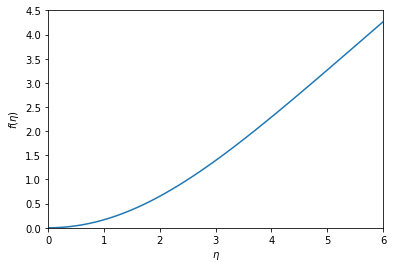

In [10]:
plt.plot(eta, f(params, eta))
plt.xlabel('$\eta$')
plt.ylabel('$f(\eta)$')
plt.xlim([0, 6])
plt.ylim([0, 4.5])
plt.savefig('nn-blasius.png')